# Skymaps

In [1]:
###############################################################
# Fig-5: GW190521 skymaps
##############################################################
import matplotlib

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.size"] = 9
matplotlib.rcParams["savefig.dpi"] = 300
matplotlib.rcParams["legend.fontsize"] = 9

import pandas as pd
import itertools
import healpy as hp
from astropy.coordinates import SkyCoord
import matplotlib.pylab as plt
import numpy as np

# Corner Plots

In [2]:
import bilby

In [3]:
nongr_res = '/home1/srashti.goyal/tgr-lensing/codes/S190521g_bilby_pipe/27022022_tm_off_nGR_py39/final_result/ProdF12_data0_1242442967-459473_analysis_H1L1V1_merge_result.hdf5'
gr_res = '/home1/srashti.goyal/tgr-lensing/codes/S190521g_bilby_pipe/27022022_tm_off_GR/result/ProdF12_data0_1242442967-459473_analysis_H1L1V1_dynesty_merge_result.json'

In [4]:
ra = 3.3584716297657375
dec = 0.6078060638702143
redshift = 0.438

In [5]:
event='S190521g'
nongr_bilby = bilby.result.read_in_result(nongr_res)
gr_bilby = bilby.result.read_in_result(gr_res)
plt.rcParams['text.usetex'] = True

In [6]:
labels_ngr= ["$M_c$","q","$a_1$","$a_2$",r'$\iota$',"$d_L$","$\psi$",'$\phi_c$','$t_c$',"$\Delta t_{12}$","$\phi_{lens}$","$\\alpha$","$\delta$"]

pars_ngr =['chirp_mass','mass_ratio','a_1','a_2','theta_jn', "luminosity_distance", 'psi','phase','geocent_time','t12','lens_angle','ra','dec']


labels= ["$M_c$","q","$a_1$","$a_2$",r'$\iota$',"$d_L$","$\psi$",'$\phi_c$','$t_c$',"$\\alpha$","$\delta$"]

pars =['chirp_mass','mass_ratio','a_1','a_2','theta_jn', "luminosity_distance", 'psi','phase','geocent_time','ra','dec']



In [7]:
nongr_bilby.log_bayes_factor-gr_bilby.log_bayes_factor

3.212687468560489

In [8]:
print(labels)

['$M_c$', 'q', '$a_1$', '$a_2$', '$\\iota$', '$d_L$', '$\\psi$', '$\\phi_c$', '$t_c$', '$\\alpha$', '$\\delta$']


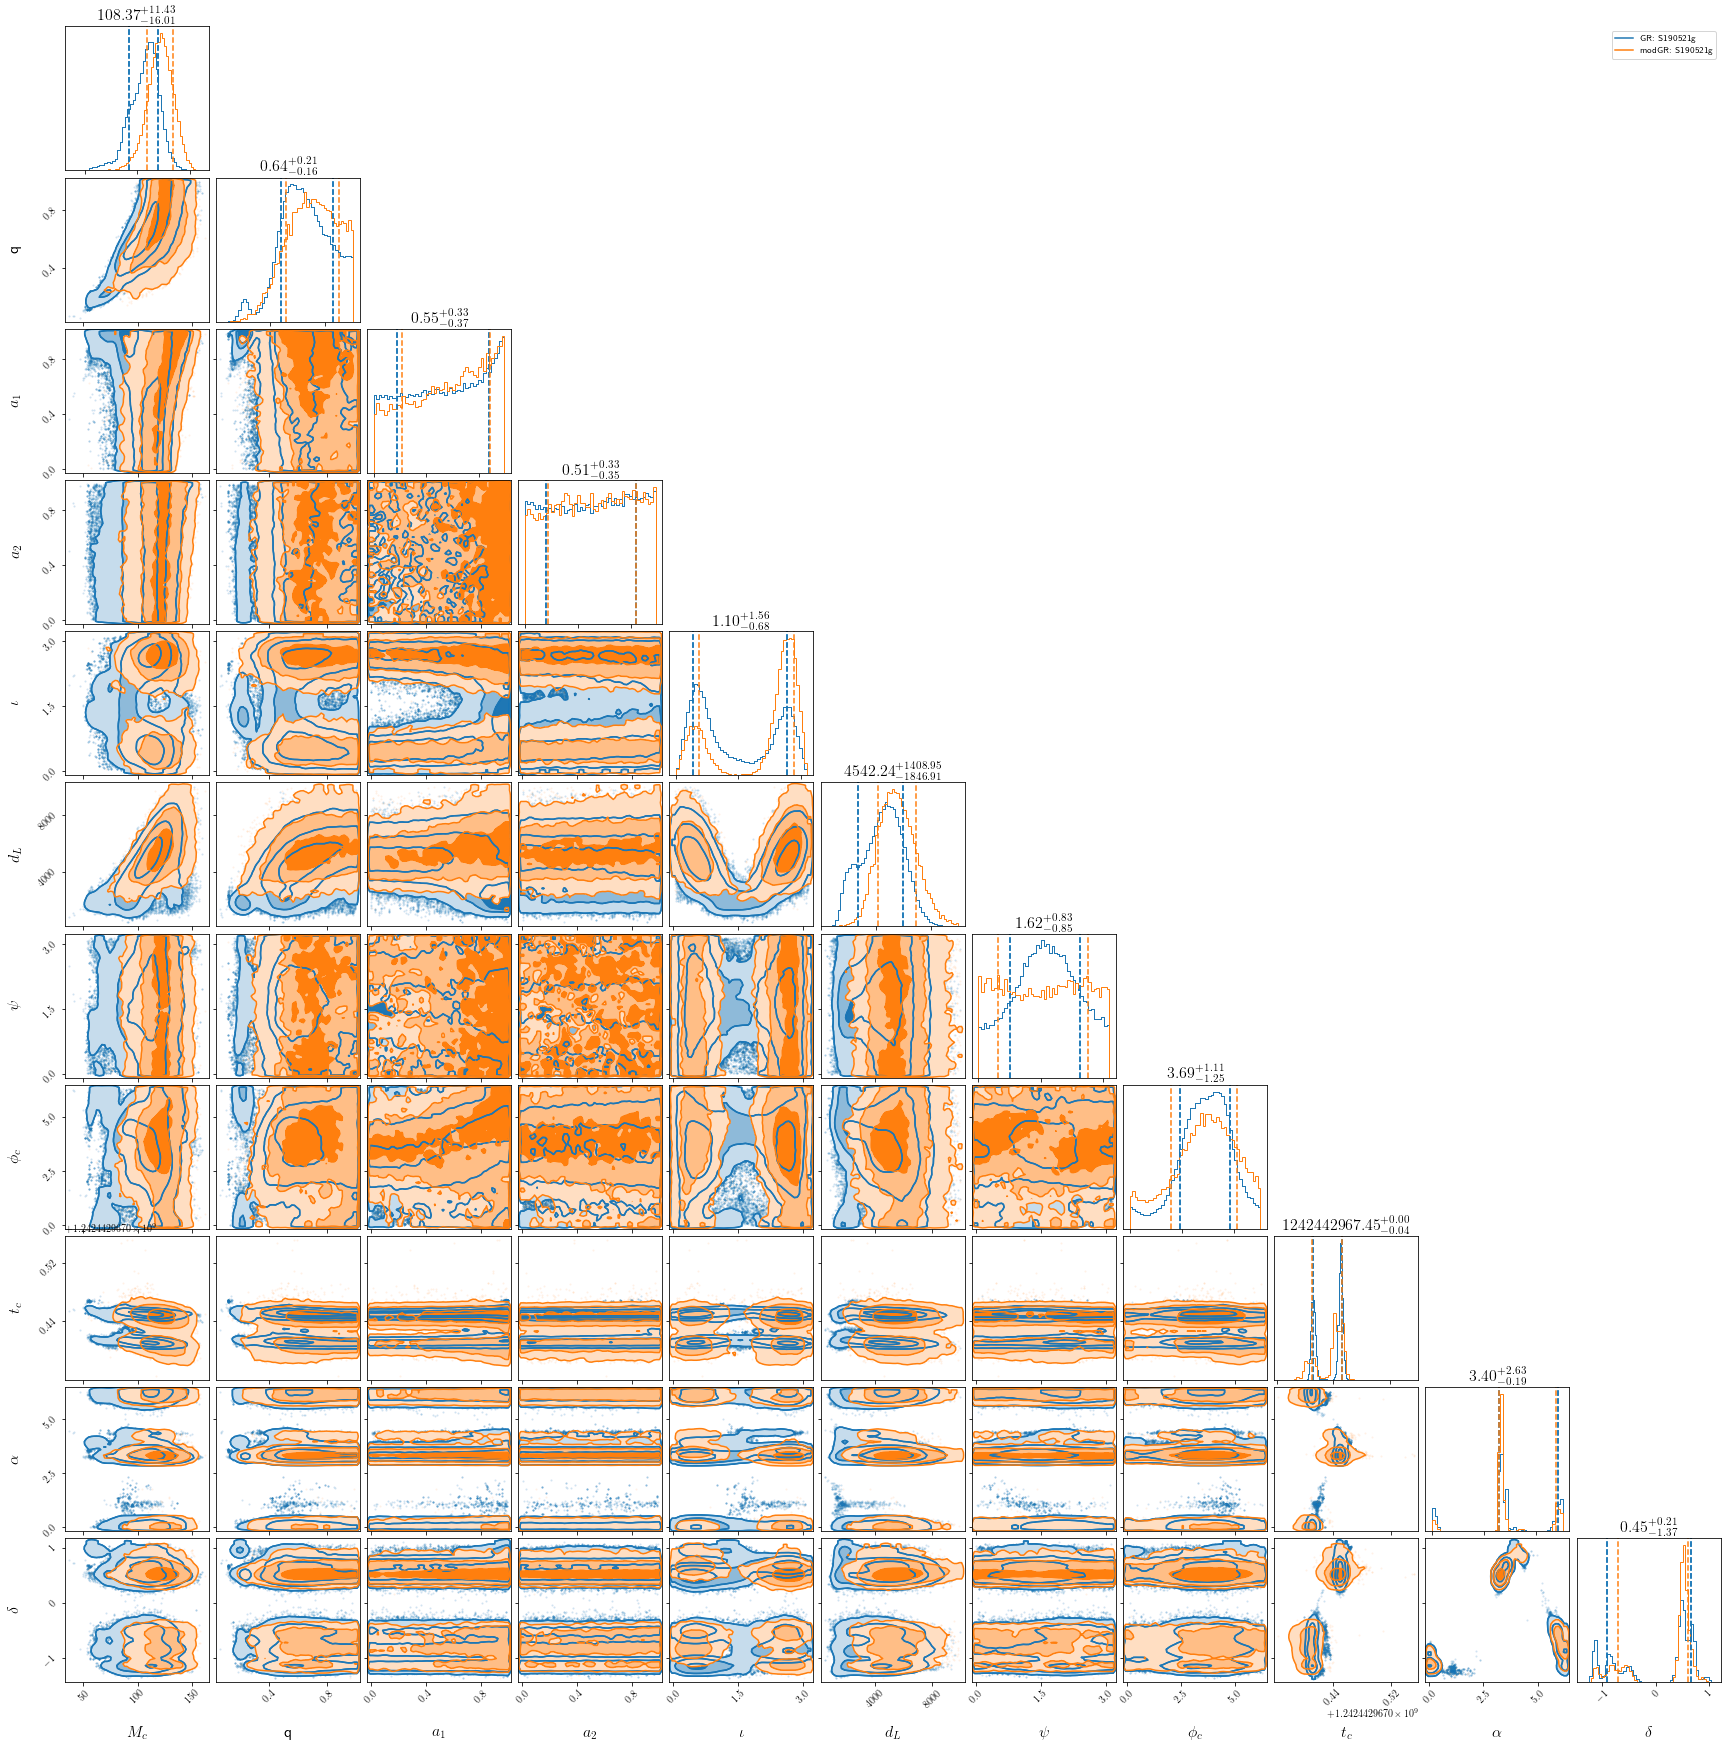

In [9]:
# res.plot_corner(parameters=pars, save=True,labels = pars,filename = outfile+'_corner.png')
# 
#["pars"] * len(pars)
figpath='figs/'
nongr_bilby.plot_corner(parameters=pars_ngr, save=True,labels=labels_ngr,filename = figpath+'/190521_nonGR_corner.pdf')

bilby.result.plot_multiple([gr_bilby, nongr_bilby],parameters=pars, save=True,labels=['GR: '+event,'modGR: '+event], fontsize = 14,

                               corner_labels = labels,filename = figpath+'/190521_combined_corner.pdf')


plt.show()

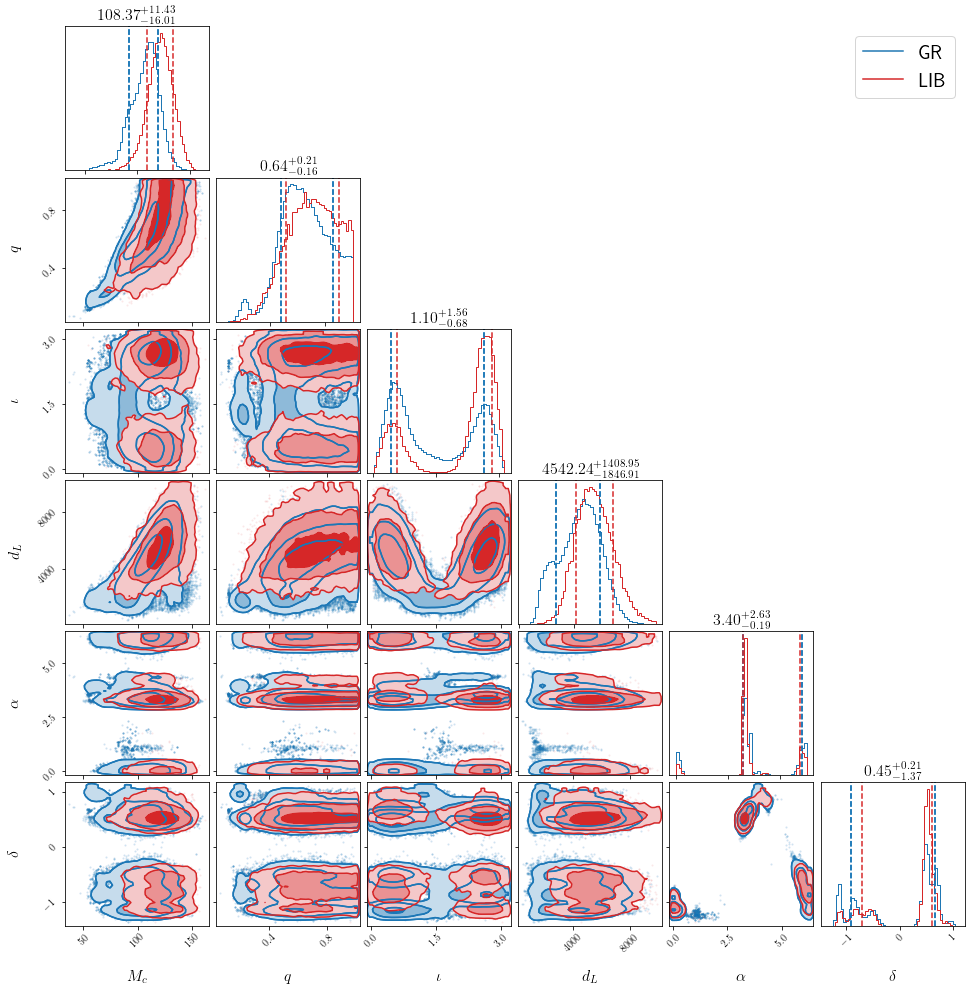

In [ ]:
labels_red= ["$M_c$","$q$",r'$\iota$',"$d_L$","$\\alpha$","$\delta$"]

pars_red =['chirp_mass','mass_ratio','theta_jn', "luminosity_distance",'ra','dec']



fig=bilby.result.plot_multiple([gr_bilby,nongr_bilby],parameters=pars_red, save=False,labels=['GR','LIB'],fontsize=20,colours=['C0','tab:red'],

                               corner_labels = labels_red,filename = figpath+'/190521_combined_corner_reduced.pdf')
import pylab as plot
params = {'legend.fontsize': 24,
          'legend.handlelength': 2}
plot.rcParams.update(params)
fig.savefig(figpath+'/190521_combined_corner_reduced.pdf')

fig.show()

In [ ]:
#nongr_bilby.posterior['t12']*=1000

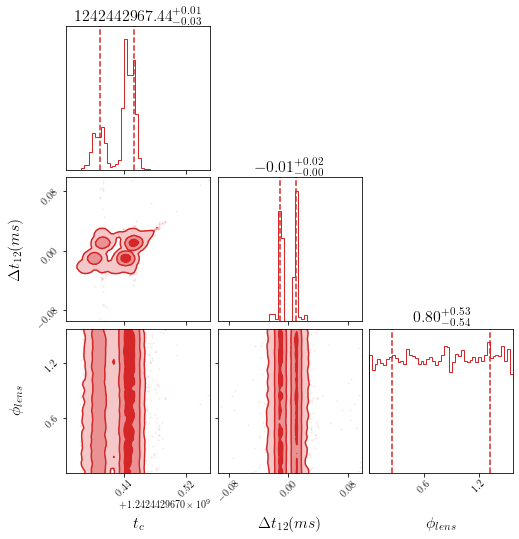

In [12]:
labels_ngr_red= ['$t_c$',"$\Delta t_{12}(ms)$","$\phi_{lens}$"]

pars_ngr_red =['geocent_time','t12','lens_angle']


nongr_bilby.plot_corner(parameters=pars_ngr_red, save=True,labels=labels_ngr_red,fontsize=20filename = figpath+'/190521_nonGR_corner_red.pdf',color='tab:red')


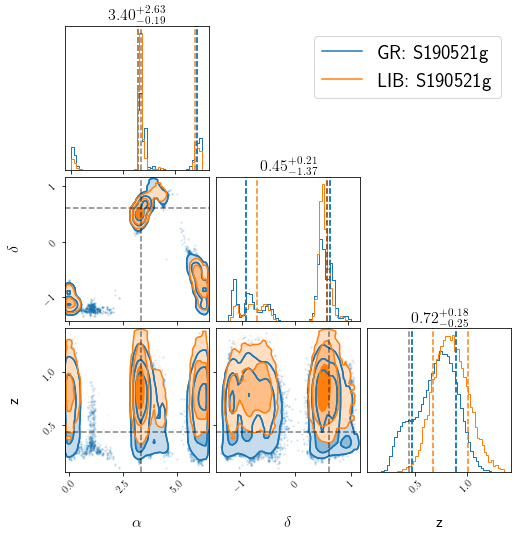

In [13]:
fig=bilby.result.plot_multiple([gr_bilby, nongr_bilby],parameters=['ra','dec','redshift'], save=False,labels=['GR: '+event,'LIB: '+event], fontsize = 14,

                               corner_labels =["$\\alpha$","$\delta$","z"] ,filename = 'figs/combined_corner_sky.pdf')


for i in range(3):
    for j in range(i+1):
        fig.axes[3*i+j].axvline([ra,dec,redshift][j],color='k',ls='dashed',alpha=0.5)

for i in range(1,3):
    for j in range(i):
        fig.axes[3*i+j].axhline([ra,dec,redshift][i],color='k',ls='dashed',alpha=0.5)


fig.savefig('figs/190521_combined_corner_sky.pdf')        
fig.show()

In [18]:
t12, lens_angle = nongr_bilby.posterior["t12"], nongr_bilby.posterior["lens_angle"]
lnl = nongr_bilby.posterior["log_likelihood"]

In [19]:
lnl=nongr_bilby.posterior["log_likelihood"]+nongr_bilby.posterior["log_prior"]

In [ ]:
plt.figure(figsize=(3.375, 3))
plt.scatter(t12*1000, lens_angle, c=lnl, s=0.1, cmap='Reds')
plt.xlim(-100,100)
plt.ylim(0,np.pi/2)
plt.xlabel('$\Delta t_{12}(ms)$')
plt.ylabel('$\phi_{lens}(rad)$')
plt.colorbar(label = 'log (likelihood x prior)')
maxidx = np.argmax(lnl)
print(t12[maxidx]*1000, lens_angle[maxidx])
plt.plot(t12[maxidx]*1000, lens_angle[maxidx],'.',c='b')
plt.title('max L: t12 ' + str(np.round(t12[maxidx]*1000,2))+ 'ms lensangle: ' + str(np.round(lens_angle[maxidx],2)))
plt.savefig(figpath+'/190521_combined_2dscatter.pdf')
plt.show()

### waveform and mismatchs

In [21]:
#nongr_bilby.posterior.iloc[maxidx]

In [22]:
maxidx = np.argmax(nongr_bilby.posterior["log_likelihood"]+nongr_bilby.posterior["log_prior"])
max_l_nongr = dict(nongr_bilby.posterior.iloc[maxidx])
maxidx = np.argmax(gr_bilby.posterior["log_likelihood"]+gr_bilby.posterior["log_prior"])
max_l_gr = dict(gr_bilby.posterior.iloc[maxidx])
max_l_gr['t12'],max_l_gr['lens_angle']=0,0

In [23]:
max_l_nongr, max_l_gr

({'H1_matched_filter_snr': (7.524538955993612+1.0581307133667746j),
  'H1_optimal_snr': 8.31897611099065,
  'L1_matched_filter_snr': (12.742701083174055-0.21028439242279345j),
  'L1_optimal_snr': 13.985569597872782,
  'V1_matched_filter_snr': (2.9224059091618577+1.4742644522219355j),
  'V1_optimal_snr': 2.467778131007722,
  'a_1': 0.624876692274714,
  'a_2': 0.06076557959067529,
  'azimuth': 5.014974108574042,
  'chi_1_in_plane': 0.5256977938947914,
  'chi_2_in_plane': 0.059900117585766695,
  'chi_eff': 0.20828858928757968,
  'chi_p': 0.5256977938947914,
  'chirp_mass': 123.58099379535172,
  'chirp_mass_source': 69.2689747317677,
  'comoving_distance': 2822.7296530935528,
  'cos_tilt_1': 0.5405958206345627,
  'cos_tilt_2': -0.1681737745874863,
  'dec': 0.42478936695739145,
  'geocent_time': 1242442967.4399602,
  'iota': 2.6523035328163944,
  'lens_angle': 0.06236688169288641,
  'log_likelihood': 111.0978442198494,
  'log_prior': 137.0471419597392,
  'luminosity_distance': 5035.95924582

# Strain Data

In [24]:
%matplotlib inline

import numpy as np
import matplotlib
from matplotlib import pyplot as plt


# LIGO-specific software:
from gwpy.timeseries import TimeSeries   # https://gwpy.github.io/

In [25]:
event = "GW190521"
trigtime=1242442967.447
f_range=(9, 400)
q_range=(6,6)
searchwin=0.1
outseg=(-4+trigtime,4+trigtime)
delta_t=1./1024
times = np.arange(outseg[0],outseg[1],delta_t)

dets=["H1","L1","V1"]
det_names = ['Hanford','Livingston','Virgo']

In [26]:
data_dir='data/'
white_data = [np.genfromtxt("./{}/whitened_data_{}.dat".format(data_dir,det)) for det in dets]


In [27]:
import scipy.signal as sig

sample_rate = 1024.0
nsamples = 4096
t = np.arange(nsamples) / sample_rate
nyq_rate = sample_rate / 2.0
width = 8.0/nyq_rate
ripple_db = 10
N, beta = sig.kaiserord(ripple_db, width)
cutoff_hz = 128

# low pass filter the data
taps = sig.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
temp = [sig.lfilter(taps, 1.0, x) for x in white_data]
temp = [np.flipud(x) for x in temp]
temp = [sig.lfilter(taps, 1.0, x) for x in temp]
low_pass_data = [np.flipud(x) for x in temp]

In [28]:
white_data = [TimeSeries(data=wd, dt=delta_t, t0=times[0]) for w,wd in enumerate(white_data)]
low_pass_data = [TimeSeries(data=wd, dt=delta_t, t0=times[0]) for w,wd in enumerate(low_pass_data)]


In [29]:
print("Making white-noisy Q-scans")

# warnings from qtransform are ignorable
import warnings
warnings.simplefilter('ignore', category=UserWarning)

qscans_white_noisy = [wd.q_transform(frange=f_range, qrange=q_range, 
                         outseg=outseg, whiten=False) for wd in white_data]

qtimes = qscans_white_noisy[0].xindex.value
qfreqs = qscans_white_noisy[0].yindex.value
print(qfreqs)

Making white-noisy Q-scans
[  9.    9.5  10.  ... 328.5 329.  329.5]


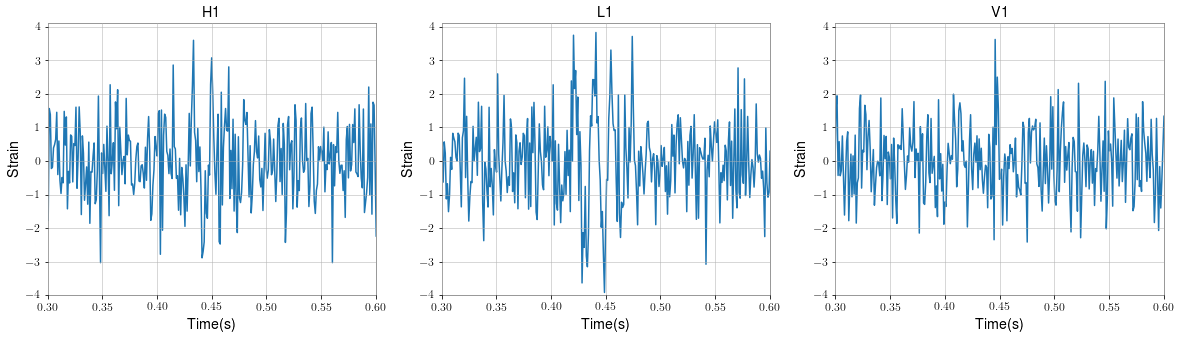

In [30]:
nanosecond=np.mod(1242442967.44726562,1)
origin=1242442967
plt.figure(figsize=(20,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(np.array(white_data[i].xindex)-origin, white_data[i]) 
    plt.xlim(0.3, 0.6) 
    plt.ylim(-4, 4.1)
    plt.xlabel('Time(s)')
    plt.ylabel('Strain')
    plt.title(dets[i])
plt.show()

### adding WFs

In [31]:
import waveform_model
import os
import bilby
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import json
import seaborn as sns
import argparse


from pycbc.psd import interpolate, inverse_spectrum_truncation

event='S190521g'

In [32]:
trigger_time = 1242442967.459473
minimum_frequency = 20
maximum_frequency = 224
duration = 4#event_specs['duration']
sampling_frequency = 512
reference_frequency = 10

gps_start_time = trigger_time + 2 - duration


# setup the interferometers that should be used
interferometers = bilby.gw.detector.InterferometerList(['H1','L1','V1'])
waveform_arguments = dict(waveform_approximant = 'IMRPhenomXPHM', reference_frequency = reference_frequency)
waveform_generator = bilby.gw.WaveformGenerator(duration = duration, sampling_frequency = sampling_frequency, frequency_domain_source_model = waveform_model.ModelGenericBeyondGRLensingBBH, waveform_arguments = waveform_arguments)



18:04 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: waveform_model.ModelGenericBeyondGRLensingBBH
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [33]:
#max_l_nongr

In [34]:

ifos2 = bilby.gw.detector.InterferometerList(['H1','L1','V1'])
ifos3 = bilby.gw.detector.InterferometerList(['H1','L1','V1'])

ifos2.set_strain_data_from_zero_noise(sampling_frequency=sampling_frequency, duration=duration,
   start_time=gps_start_time)
ifos3.set_strain_data_from_zero_noise(sampling_frequency=sampling_frequency, duration=duration,
   start_time=gps_start_time)
injection_gr = ifos2.inject_signal(waveform_generator=waveform_generator,parameters=max_l_gr)

injection_nongr = ifos3.inject_signal(waveform_generator=waveform_generator,parameters=max_l_nongr)




18:04 bilby INFO    : Injected signal in H1:
18:04 bilby INFO    :   optimal SNR = 14.95
18:04 bilby INFO    :   matched filter SNR = 14.95+0.00j
18:04 bilby INFO    :   chirp_mass = 72.85782723362881
18:04 bilby INFO    :   mass_ratio = 0.2234542911361927
18:04 bilby INFO    :   a_1 = 0.9238129032340545
18:04 bilby INFO    :   a_2 = 0.2315453207798041
18:04 bilby INFO    :   tilt_1 = 2.3975749586992086
18:04 bilby INFO    :   tilt_2 = 1.2796901916440346
18:04 bilby INFO    :   phi_12 = 0.1300805639573906
18:04 bilby INFO    :   phi_jl = 1.8268045822594208
18:04 bilby INFO    :   theta_jn = 1.2412139984078205
18:04 bilby INFO    :   psi = 1.2642723095484638
18:04 bilby INFO    :   phase = 6.014237380128779
18:04 bilby INFO    :   azimuth = 5.079163106226374
18:04 bilby INFO    :   zenith = 1.7823595022325978
18:04 bilby INFO    :   geocent_time = 1242442967.444657
18:04 bilby INFO    :   recalib_H1_amplitude_0 = 0.0013496622470417878
18:04 bilby INFO    :   recalib_H1_amplitude_1 = -0.

<Figure size 432x1080 with 0 Axes>

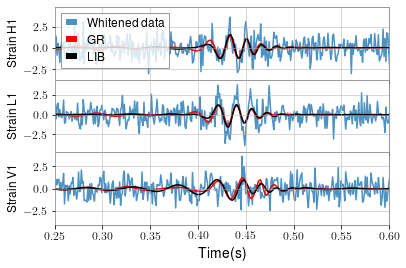

In [35]:
nanosecond=np.mod(1242442967.44726562,1)
origin=1242442967
plt.figure(figsize=(6,15))
fig, axes = plt.subplots(nrows=3, sharex=True)
fig.subplots_adjust(hspace=0)



for i in range(3):
    #plt.subplot(1,3,i+1)
    axes[i].plot(np.array(white_data[i].xindex)-origin, white_data[i], label = 'Whitened data',alpha = 0.8,c='C0') 
    plt.ylim(-4, 4.1)
    axes[i].set_ylabel('Strain '+ dets[i],fontsize=12)
    #plt.title(dets[i])
    #det = ifos1[i]

    #ax[i].plot(det.strain_data.time_array,
    #          det.strain_data.time_domain_strain, color='C2',
    #          label= ' real data ')#$\Delta t_{12}$ =  '+ str(t12_arr[0])+ ', $\phi_{lens}$ = '+ str(lens_angle_arr[0])[:4])
   
    det = ifos2[i]

    #ax.set_xtick

    factor= 1e-1/np.std(det.strain_data.time_domain_strain)
    axes[i].plot(det.strain_data.time_array-origin,
              factor*det.strain_data.time_domain_strain,color='r',
              label= 'GR')

   
    det = ifos3[i]
    factor= 1e-1/np.std(det.strain_data.time_domain_strain)


    axes[i].plot(det.strain_data.time_array-origin,
              factor*det.strain_data.time_domain_strain,color='k',
              label= 'LIB')
    
    #axes[i].set_xticklabels([])
    #axes[i].set_yticklabels([])
axes[i].set_xlim(0.25, 0.6) 
    #axes[i].set_aspect('equal')



axes[i].set_xlabel('Time(s)',fontsize=14)

 
axes[0].legend(loc='upper left',fontsize=12)
#plt.tight_layout()
plt.savefig('figs/190521_white_strain_maxL_WFs.pdf')
plt.show()

# Background analysis

In [39]:
import bilby
background_df = pd.read_csv('data/background_190521.csv')

In [40]:
background_df.tail()

Unnamed: 0                                             gr_res  \
95          95  /home1/srashti.goyal/tgr-lensing/codes/S190521...   
96          96  /home1/srashti.goyal/tgr-lensing/codes/S190521...   
97          97  /home1/srashti.goyal/tgr-lensing/codes/S190521...   
98          98  /home1/srashti.goyal/tgr-lensing/codes/S190521...   
99          99  /home1/srashti.goyal/tgr-lensing/codes/S190521...   

                                            nongr_res  injection number  \
95  /home1/srashti.goyal/tgr-lensing/codes/S190521...                95   
96  /home1/srashti.goyal/tgr-lensing/codes/S190521...                96   
97  /home1/srashti.goyal/tgr-lensing/codes/S190521...                97   
98  /home1/srashti.goyal/tgr-lensing/codes/S190521...                98   
99  /home1/srashti.goyal/tgr-lensing/codes/S190521...                99   

     GR logBF  nGR logBF      GR logZ     nGR logZ  log_Z_ngr_gr  \
95  78.028026  69.368864 -2377.803555 -2375.719361      2.084194   
96  78.465043  81.314011 -2469.525672 -2575.475622   -105.949950   
97  36.789997  46.962678 -2482.372203 -2405.835424     76.536779   
98  86.276721  75.314190 -2427.257294 -2503.618858    -76.361564   
99  54.641025  67.039818 -2459.414170 -2463.753456     -4.339286   

    log_BF_ngr_gr  
95      -8.659162  
96       2.848968  
97      10.172681  
98     -10.962531  
99      12.398793

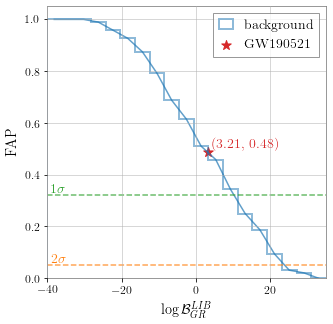

In [43]:
plt.figure(figsize=(5,5))
import matplotlib.lines as mlines
plt.rc('font', family='serif')
fg_bf = 3.21



bins=np.linspace(-40.1,35,20)
d,b,f=plt.hist(background_df['log_BF_ngr_gr'],bins=bins,lw=2,histtype='step',density=True,cumulative=-1,label='background',alpha=0.5,color='tab:blue')
plt.plot((b[1:]+b[:-1])/2,d,color='tab:blue',alpha=0.7)
FAP=np.interp(fg_bf,(b[1:]+b[:-1])/2,d)
plt.scatter([fg_bf],[FAP],marker='*',s=10**2,color = 'tab:red',label='GW190521',alpha=1)

#plt.axvline(fg_bf,ls='dashed',color = 'k',label='GW190521')
#plt.axhline(FAP,ls='dashed',color = 'k')
#plt.plot([fg_bf,fg_bf],[0,FAP],ls='dashed',color = 'tab:red',label='GW190521',alpha=0.7)
#plt.plot([b[0],fg_bf],[FAP,FAP],ls='dashed',color = 'tab:red',alpha=0.7)


plt.axhline(0.32,ls='dashed',color = 'tab:green',alpha=0.7)

plt.text(-40+1,0.32+0.01,'1$\sigma$',color='tab:green',fontsize=14)
plt.axhline(0.05,ls='dashed',color = 'tab:orange',alpha=0.7)
plt.text(-40+1,0.05+0.01,'2$\sigma$',color='tab:orange',fontsize=14)



#plt.text(fg_bf+2,FAP+0.05,str(fg_bf)+', ' + str(FAP)[:4],bbox=dict(boxstyle="square",fill=None,color='tab:red'),fontsize=14)
plt.text(fg_bf+1,FAP+0.02,'('+str(fg_bf)+', ' + str(FAP)[:4]+')',fontsize=14,color='tab:red')
plt.xlim(bins[0],bins[-1])
plt.legend(fontsize=14)
#plt.grid()
plt.xlabel('$\log \mathcal{B}^{LIB}_{GR}$')
plt.ylabel('FAP')
plt.savefig('figs/190521_background_BF_ngr_gr_v1.pdf')
plt.show()

In [44]:
bilby_params = ['mass_1', 'mass_2', 'luminosity_distance', 'dec', 'ra', 'theta_jn','psi', 'phase', 'geocent_time', 't12', 'lens_angle','a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl']


In [45]:
_=[print(par, 'GR: %.3f'%max_l_gr[par], 'modGR: %.3f'%max_l_nongr[par]) for par in bilby_params]

mass_1 GR: 186.415 modGR: 185.637
mass_2 GR: 41.655 modGR: 110.033
luminosity_distance GR: 1660.010 modGR: 5035.959
dec GR: 0.494 modGR: 0.425
ra GR: 3.293 modGR: 3.278
theta_jn GR: 1.241 modGR: 2.755
psi GR: 1.264 modGR: 2.389
phase GR: 6.014 modGR: 2.615
geocent_time GR: 1242442967.445 modGR: 1242442967.440
t12 GR: 0.000 modGR: -0.010
lens_angle GR: 0.000 modGR: 0.062
a_1 GR: 0.924 modGR: 0.625
a_2 GR: 0.232 modGR: 0.061
tilt_1 GR: 2.398 modGR: 1.000
tilt_2 GR: 1.280 modGR: 1.740
phi_12 GR: 0.130 modGR: 4.982
phi_jl GR: 1.827 modGR: 2.901
